In [1]:
import sherpa
sherpa.__version__

'4.14.0'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import itertools

In [4]:
import sherpa.astro.ui as ui

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


In [5]:
import sherpa.astro.xspec as xs

In [6]:
filename = "XMM_test_files/MOS1_PWN.grp"
ui.load_pha(1, filename)

read ARF file XMM_test_files/MOS1_PWN.arf
read RMF file XMM_test_files/MOS1_PWN.rmf


/home/lucagiunti/miniconda3/envs/gammapyXrayNEW/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the ARF 'XMM_test_files/MOS1_PWN.arf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)
/home/lucagiunti/miniconda3/envs/gammapyXrayNEW/lib/python3.9/site-packages/sherpa/astro/data.py:952: UserWarning: The minimum ENERG_LO in the RMF 'XMM_test_files/MOS1_PWN.rmf' was 0 and has been replaced by 1e-10
  warnings.warn(wmsg)


read background file XMM_test_files/MOS1_PWN_bkg.fits


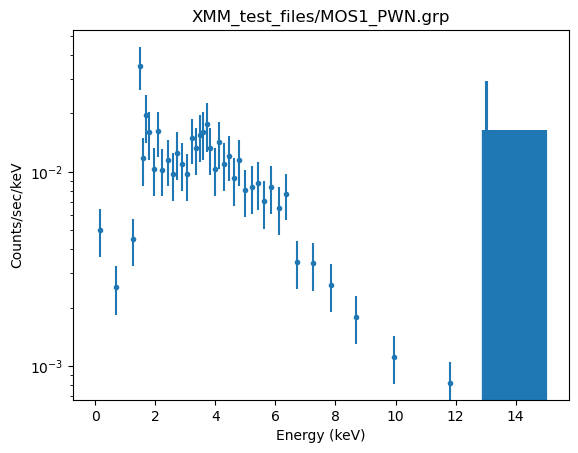

In [7]:
ui.plot_data(1)
plt.yscale("log")

In [8]:
ui.notice(2, 8)

In [9]:
ui.set_stat("wstat")

In [19]:
ui.set_source(ui.xstbabs.absorption * ui.powlaw1d.pl)

absorption.nh = 5
pl.gamma = 1.8
pl.ampl = 6e-4

In [85]:
model2=absorption*pl
model2

<BinaryOpModel model instance '(xstbabs.absorption * powlaw1d.pl)'>

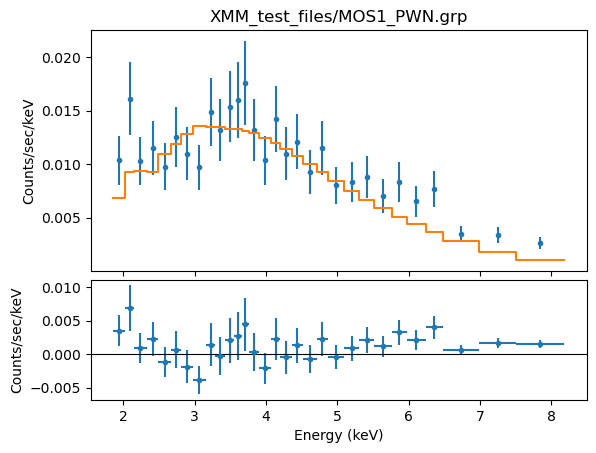

In [20]:
ui.plot_fit_resid()

In [14]:
ui.guess(pl)

In [15]:
pl

<PowLaw1D model instance 'powlaw1d.pl'>

In [17]:
ui.guess(absorption)

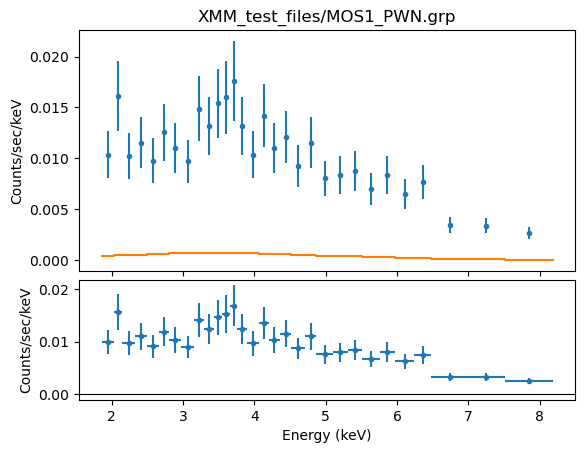

In [18]:
ui.plot_fit_resid()

In [21]:
ui.fit()
results = ui.get_fit_results()

Dataset               = 1
Method                = levmar
Statistic             = wstat
Initial fit statistic = 28.8963
Final fit statistic   = 15.5153 at function evaluation 37
Data points           = 30
Degrees of freedom    = 27
Probability [Q-value] = 0.961567
Reduced statistic     = 0.574642
Change in statistic   = 13.3809
   absorption.nH   4.69201      +/- 1.64881     
   pl.gamma       1.4934       +/- 0.488495    
   pl.ampl        0.000312487  +/- 0.000258679 


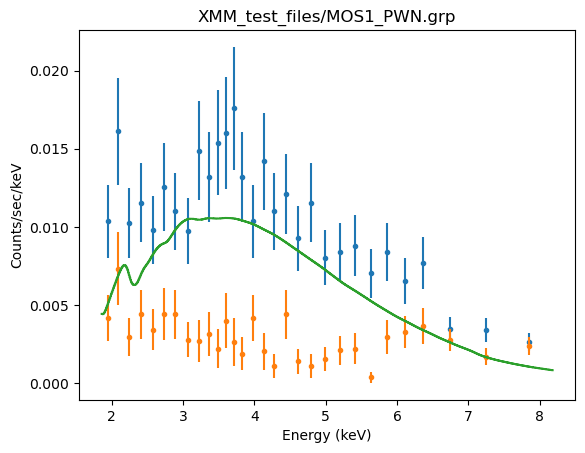

In [41]:
ui.plot_data()
ui.plot_bkg(overplot=True)
ui.plot_model(overplot=True)
ui.plot

In [45]:
data = ui.get_data_plot()
data_bkg = ui.get_bkg_plot()
data_model = ui.get_model_plot()

In [73]:
stat=ui.get_stat()

In [75]:
daata=ui.get_data()
datafit = daata.to_fit(staterrfunc=stat.calc_staterror)
#daata.eval_model_to_fit(absorption*pl)

In [76]:
datafit

(array([20., 22., 21., 21., 20., 20., 20., 21., 22., 21., 21., 20., 20.,
        21., 20., 21., 20., 22., 20., 21., 21., 20., 20., 20., 20., 20.,
        21., 20., 20., 20.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 None)

In [86]:
model = ui.get_model()
model

<RSPModelPHA model instance 'apply_rmf(apply_arf((11370.57 * (xstbabs.absorption * powlaw1d.pl))))'>

In [82]:
modeldata= daata.eval_model_to_fit(model)

In [83]:
modeldata

array([ 9.85480242,  9.32568951, 14.20588592, 12.59811665, 16.82295451,
       14.28532634, 17.77993076, 22.55807225, 15.47314793, 16.78100921,
       14.37339559, 13.21131743, 11.97392491, 16.55630426, 19.62861802,
       14.52426756, 17.23766888, 16.38670274, 18.25984772, 14.36663275,
       18.99570248, 15.56467628, 13.42477247, 14.89923366, 10.96367077,
       12.23357649,  9.26827761, 15.17149896,  9.96109127,  8.05778358])

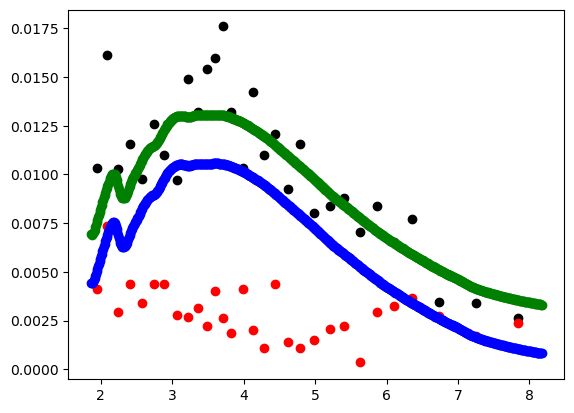

In [52]:
plt.scatter(data.x, data.y, color="k")
plt.scatter(data_bkg.x, data_bkg.y, color="r")
plt.scatter(data_model.x, data_model.y, color="b")
plt.scatter(data_model.x, data_model.y+0.0025, color="g")

In [87]:
data = ui.get_data()

In [89]:
arf=data.get_arf()

In [105]:
arf

<DataARF data set instance 'XMM_test_files/MOS1_PWN.arf'>

In [91]:
ui.get_source()

<BinaryOpModel model instance '(xstbabs.absorption * powlaw1d.pl)'>

In [93]:
mod=ui.get_model()

In [95]:
mod.__class__

sherpa.astro.instrument.RSPModelPHA

In [103]:
moddata=daata.get_

In [121]:
ui.get_model_plot_prefs()

{'xerrorbars': False,
 'yerrorbars': False,
 'ecolor': None,
 'capsize': None,
 'barsabove': False,
 'xlog': False,
 'ylog': False,
 'linestyle': 'solid',
 'drawstyle': 'default',
 'color': None,
 'alpha': None,
 'marker': 'None',
 'markerfacecolor': None,
 'markersize': None,
 'linecolor': None}

(0.001, 30)

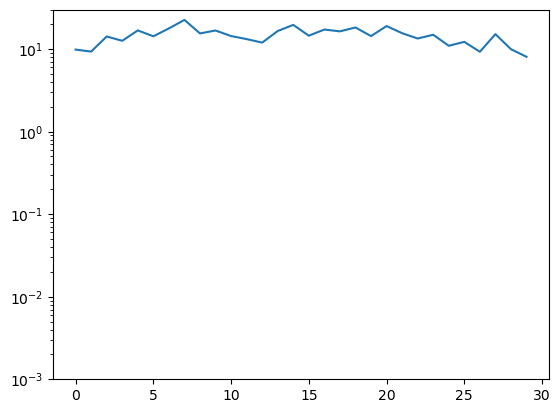

In [114]:
plt.plot(moddata)
plt.yscale("log")
plt.ylim(1e-3, 30)

In [110]:
daata.units

'energy'

In [115]:
mod

<RSPModelPHA model instance 'apply_rmf(apply_arf((11370.57 * (xstbabs.absorption * powlaw1d.pl))))'>